In [1]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
df=pd.read_csv("de01-data.csv", header=0,delimiter=',',encoding='utf-8')

In [9]:
gb=df.groupby(['Sexuality'])['Result'].count()
gb

Sexuality
B    133
G    147
L    202
Q    413
T    105
Name: Result, dtype: int64

In [10]:
df['TimeToStudy'].skew()

-0.07042972912340169

([<matplotlib.patches.Wedge at 0x1d688a10550>,
 [Text(0.987429900240286, 0.4847496179590645, 'B'),
  Text(0.24173220355409844, 1.073110218833499, 'G'),
  Text(-0.826323896255983, 0.726077694517833, 'L'),
  Text(-0.3399185762739153, -1.046162206115244, 'Q'),
  Text(1.059804299426045, -0.2946435930375377, 'T')],
 [Text(0.5385981274037923, 0.26440888252312605, '14.53%'),
  Text(0.1318539292113264, 0.5853328466364539, '13.89%'),
  Text(-0.4507221252305361, 0.3960423788279089, '20.21%'),
  Text(-0.1854101325130447, -0.5706339306083149, '42.74%'),
  Text(0.5780750724142063, -0.16071468711138417, '8.63%')])

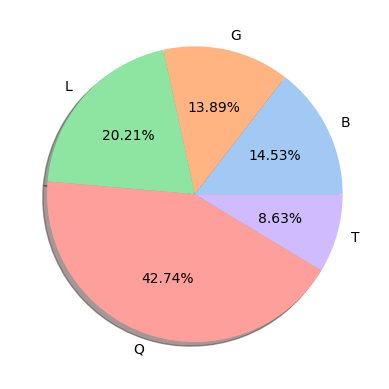

In [17]:
gb=df[df['Result']=='YES'].groupby(['Sexuality'])['Result'].count()
labels=gb.index
data = list(gb)
colors = sns.color_palette('pastel') #Tạo bảng màu
plt.pie(data,labels=labels, colors=colors, autopct='%1.2f%%', shadow= True)

In [20]:
crosdata = pd.crosstab(df['Sexuality'], [df['InterviewScore']], rownames=['Sexuality'], colnames=['InterviewScore'])
crosdata



InterviewScore,A,B,C,D,F
Sexuality,,,,,
B,5,24,30,42,32
G,8,19,40,46,34
L,9,37,64,54,38
Q,16,65,126,122,84
T,6,15,31,32,21


In [16]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(crosdata)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.9300780652577139
Independent (H0 holds true)


In [30]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('ProfessionalScore ~ Sexuality', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Sexuality,4.0,2.501237,0.625309,0.478149,0.751816
Residual,995.0,1301.232673,1.307772,NaN,NaN


In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model 
X=df[['TimeToStudy','TimeToPlay']].values
y=df['ProfessionalScore'].values
X=X.astype(float)
y=y.astype(float)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, 
                                                    random_state=16)

In [23]:

from sklearn import linear_model 

model = linear_model.LinearRegression()
model.fit(X_train,y_train)
print(model.intercept_)
print(model.coef_)

1.8525360252105272
[0.00968469 0.01172014]


In [24]:
import numpy as np
from sklearn import metrics
y_test_pred=model.predict(X_test)
print('Score or R-squared: ',model.score(X_test,y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean Absolute percentage Error:', metrics.mean_absolute_percentage_error(y_test, y_test_pred)) 

Score or R-squared:  -0.00402957123492409
Mean Absolute Error: 0.9957741901130669
Mean Squared Error: 1.307426976063301
Root Mean Squared Error: 1.1434277310190186
Mean Absolute percentage Error: 173654249807822.2


In [25]:
#Lưu trữ mô hình hồi quy xuống thiết bị
import pickle
pickle.dump(model,open('a.sv','wb'))

In [26]:
#xây dựng chương trình nhập điểm T5,T6 từ bàn phím
#Hãy dự báo điểm thi NGONNGU
import pickle
loaded_model=pickle.load(open('a.sv','rb'))
vT5=float(input("Nhập T5: "))
vT6=float(input('Nhập T6: '))

predicted_vLogic=loaded_model.predict([[vT5,vT6]])
print(f'Dự báo điểm thi NGONNGU là: {predicted_vLogic}')

Dự báo điểm thi NGONNGU là: [1.98300043]


In [31]:
import statsmodels.api as sm


#adding a constant
X_with_constant = sm.add_constant(df[["TimeToStudy","TimeToPlay"]].values)


y = df[['ProfessionalScore']].values


#performing the regression
result = sm.OLS(y, X_with_constant).fit()


# Result of statsmodels
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.253
Date:                Tue, 24 Oct 2023   Prob (F-statistic):              0.286
Time:                        15:47:56   Log-Likelihood:                -1550.3
No. Observations:                1000   AIC:                             3107.
Df Residuals:                     997   BIC:                             3121.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8134      0.096     18.860      0.0

In [32]:
df[['TimeToStudy','TimeToPlay','ProfessionalScore']].corr()

,TimeToStudy,TimeToPlay,ProfessionalScore
TimeToStudy,1.000000,0.031654,0.016941
TimeToPlay,0.031654,1.000000,0.047634
ProfessionalScore,0.016941,0.047634,1.000000


In [33]:
df['TimeToStudy'].describe()

count    1000.000000
mean        5.064000
std         2.843235
min         0.000000
25%         2.700000
50%         5.200000
75%         7.400000
max        10.000000
Name: TimeToStudy, dtype: float64

([<matplotlib.patches.Wedge at 0x1d68a60b490>,
 [Text(1.0053679774626623, 0.44635773757451114, 'B'),
  Text(0.2969211155765594, 1.0591684715496263, 'G'),
  Text(-0.8065809029736678, 0.7479486927311144, 'L'),
  Text(-0.4145580984795792, -1.018892331399641, 'Q'),
  Text(1.0406938816998714, -0.3563091980183139, 'T')],
 [Text(0.548382533161452, 0.24346785685882422, '13.30%'),
  Text(0.16195697213266874, 0.577728257208887, '14.70%'),
  Text(-0.43995321980381874, 0.40797201421697143, '20.20%'),
  Text(-0.2261225991706795, -0.5557594534907132, '41.30%'),
  Text(0.5676512081999299, -0.19435047164635302, '10.50%')])

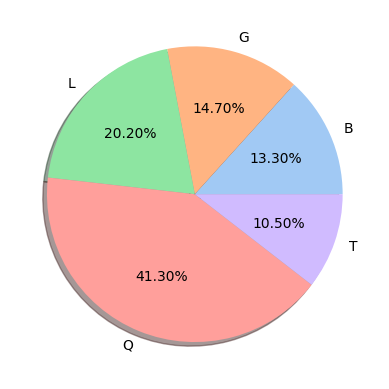

In [34]:
gb=df.groupby(['Sexuality'])['Result'].count()
labels=gb.index
data = list(gb)
colors = sns.color_palette('pastel') #Tạo bảng màu
plt.pie(data,labels=labels, colors=colors, autopct='%1.2f%%', shadow= True)

In [67]:
# đây là biểu đồ quan trọng trong việc phân tích dữ liệu định lượng 
# Biểu đồ nay cung cấp các thông tin quan trong như
#1. Q1:Từ phân vị 25%
#2. Q2: Từ phân vị 50%(median)
#3. Q3: Từ phân vị 75%
#4. Độ lớn của IQR=|Q3-Q1|
#5. Lower bound =Q1 - 1.5*IQR
#6. Upper bound = Q3 + 1.5IQR
#7. Các ngoại biên, bất thường (outlier) cần xử lý trong dữ liệu 
#Outlier: là điểm dữ liệu khác biết quá nhiều so với đa số
#Hướng dẫn 
#+Tính khoảng nghi ngờ chứa outliers
df['ProfessionalScore'].describe()
x=2.9+1.5*(2.9-1)
x

5.75

In [69]:
x=np.sort(df['ProfessionalScore'])
x
gb=df[df['ProfessionalScore']==4.].count()
gb

TimeToPlay                 15
TimeToStudy                15
ProfessionalScore          15
InterviewScore             15
Sexuality                  15
ExpectedSalary             15
SocialNetworkingTimeUse    14
YES                        15
dtype: int64

In [50]:
crosdata = pd.crosstab(df['Sexuality'], [df['InterviewScore']], rownames=['Sexuality'], colnames=['InterviewScore'])
crosdata.mode()


InterviewScore,A,B,C,D,F
0,5,15,30,32,21
1,6,19,31,42,32
2,8,24,40,46,34
3,9,37,64,54,38
4,16,65,126,122,84


In [52]:
crosdata = pd.crosstab(df['Sexuality'], [df['InterviewScore']], rownames=['Sexuality'], colnames=['InterviewScore'])
crosdata

InterviewScore,A,B,C,D,F
Sexuality,,,,,
B,5,24,30,42,32
G,8,19,40,46,34
L,9,37,64,54,38
Q,16,65,126,122,84
T,6,15,31,32,21


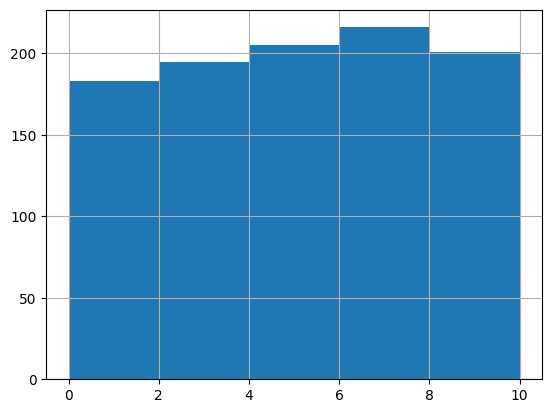

In [54]:
df['TimeToStudy'].hist(bins=5)
plt.show()

In [57]:
pv = pd.pivot_table(df, values='TimeToPlay', index=[ 'Result'], 
                    columns='Sexuality')
pv

Sexuality,B,G,L,Q,T
Result,,,,,
NO,5.193750,4.467901,5.631132,4.904286,5.290625
YES,5.233333,4.680303,5.016667,5.045813,5.895122


In [70]:
df['TimeToStudy'].describe()

count    1000.000000
mean        5.064000
std         2.843235
min         0.000000
25%         2.700000
50%         5.200000
75%         7.400000
max        10.000000
Name: TimeToStudy, dtype: float64

In [60]:
df['Result'].astype(str)
Result = pd.get_dummies(df[ 'Result'], drop_first=True,dtype=int)
df.drop('Result', axis=1, inplace=True)
df = pd.concat([df, Result], axis=1)
df.head(5)

,TimeToPlay,TimeToStudy,ProfessionalScore,InterviewScore,Sexuality,ExpectedSalary,SocialNetworkingTimeUse,YES
0,0.1,4.4,2.5,F,T,249.6,Much,0
1,4.1,5.7,3.7,D,L,114.6,Pretty,1
2,7.3,0.9,2.7,D,T,862.0,Almost,0
3,6.2,8.8,2.7,D,T,147.2,Almost,1
4,5.0,3.1,0.2,D,Q,653.4,Pretty,0


In [62]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('YES ~ Sexuality', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Sexuality,4.0,1.217593,0.304398,1.2205,0.30037
Residual,995.0,248.157407,0.249404,NaN,NaN


f:\tai lieu\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\tai lieu\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\tai lieu\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\tai lieu\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Sexuality', ylabel='ProfessionalScore'>

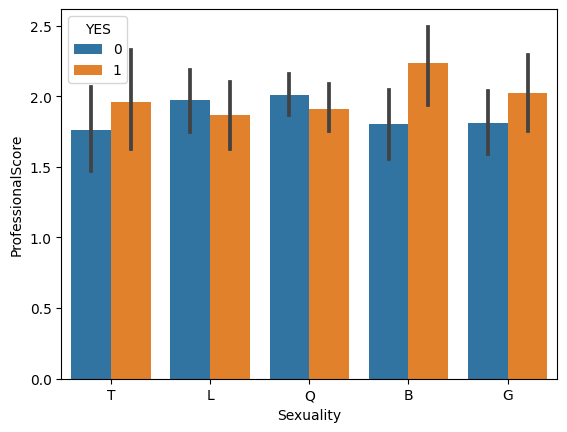

In [65]:
sns.barplot(x='Sexuality', y='ProfessionalScore', hue='YES', data=df)